In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



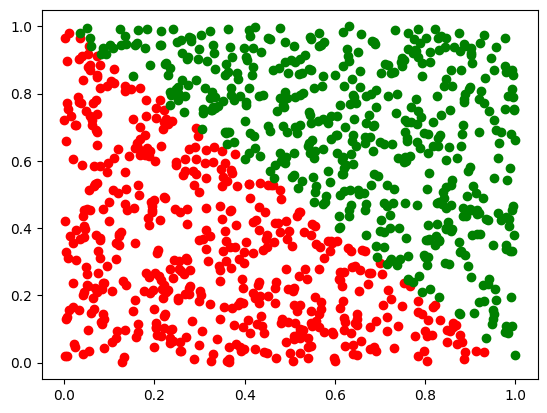

In [2]:
# Generate dummy data (1000 samples, 2 features)
num_points = 1000
x_train = np.random.rand(num_points, 2)
y_train = (x_train[:, 0] + x_train[:, 1] > 1).astype(int)  # If sum > 1, label is 1 else 0
plt.scatter(x_train[y_train==0][:,0], x_train[y_train==0][:,1], color= 'red')
plt.scatter(x_train[y_train==1][:,0], x_train[y_train==1][:,1], color = 'green')
plt.show()




In [3]:
# Define a simple model
model = Sequential([
    Dense(8, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, verbose=1)




Epoch 1/100


C:\Users\Singh\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5515 - loss: 0.6667   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5775 - loss: 0.6611 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6131 - loss: 0.6557 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6545 - loss: 0.6445 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7160 - loss: 0.6300 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7416 - loss: 0.6251 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7745 - loss: 0.6181 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8109 - loss: 0.6077 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8483 - loss: 0.5922 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8623 - loss: 0.5829 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8844 - loss: 0.5631 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

In [8]:
#Plot Desision Grid
x1_test = np.linspace(x_train[:,0].min() - 0.1, x_train[:,0].max() + 0.1, num_points)
x2_test = np.linspace(x_train[:,1].min() - 0.1, x_train[:,1].max() + 0.1, num_points)
xx,yy = np.meshgrid(x1_test, x2_test)
print(xx.shape, yy.shape, xx.ravel().shape, yy.ravel().shape)
points = np.c_[xx.ravel(), yy.ravel()]
print(points.shape)


(1000, 1000) (1000, 1000) (1000000,) (1000000,)
(1000000, 2)


In [9]:
z = model.predict(points)
z = z.reshape(xx.shape)


31250/31250 ━━━━━━━━━━━━━━━━━━━━ 27s 849us/step


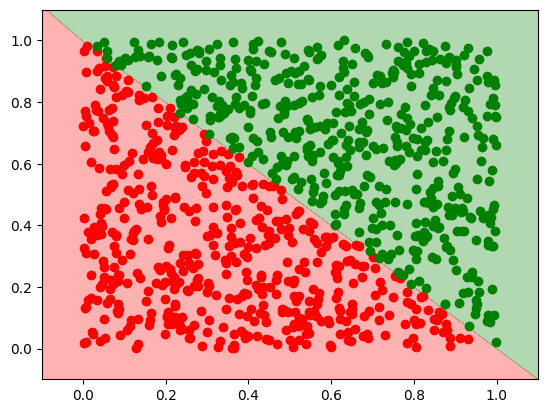

In [10]:
plt.contourf(xx, yy, z, levels=[0, 0.5, 1], colors=['red', 'green'], alpha=0.3)
plt.scatter(x_train[y_train==0][:, 0], x_train[y_train==0][:, 1], color='red', label='Class 0')
plt.scatter(x_train[y_train==1][:, 0], x_train[y_train==1][:, 1], color='green', label='Class 1')
plt.show()
